<a href="https://colab.research.google.com/github/YanisNC/Sentiment-Analysis-Multi-Label-Classification-E-Commerce-Reviews/blob/main/Sentiment_Analysis_Multi_label_Classification_on_E_Commerce_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Multi-label Classification on E-commerce Reviews

- The dataset contains 10000 samples of reviews and ratings about a fashion e-commerce.

- The reviews have been preprocessed using NLTK.

- BERT has been used for fine-tuning training.

### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
pip install transformers

     |████████████████████████████████| 1.9MB 11.3MB/s 
     |████████████████████████████████| 890kB 54.3MB/s 
     |████████████████████████████████| 3.2MB 36.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=23854776a4fe8e2272ffd8deac6c72bc9e165d914acf28689d8aefa984328532
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### Import dataset

In [ ]:
df = pd.read_csv("ratings.csv", sep=',')

In [ ]:
df.head()

,TEXT,RATING
0,The shirt was more of a smock. I expected a so...,1
1,The shirt was more of a smock. I expected a so...,1
2,The shirt was more of a smock. I expected a so...,1
3,Just received my order today. When I opened th...,1
4,"First of all, the button hole on this belt nev...",1


### Exploratory Data Analysis

The first three rows are identical. Let's remove duplicate rows.

In [ ]:
df.shape

(10000, 2)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(3467, 2)

In [ ]:
# Check if there are any NaN values.
df.isna().any()

TEXT      False
RATING    False
dtype: bool

As we can see, 6533 rows are duplicated. These rows must be removed to avoid overfitting.

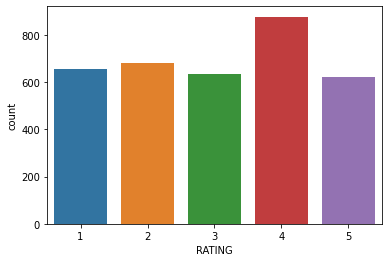

In [ ]:
sns.countplot(x=df["RATING"])
plt.show()

The classes are quite balanced

 #### Analyze the labels

In [ ]:
df["RATING"].unique()

array([1, 2, 3, 5, 4])

In [ ]:
# Let's change it so it starts at 0
df["RATING"] = df["RATING"] - 1

df["RATING"].unique()

array([0, 1, 2, 4, 3])

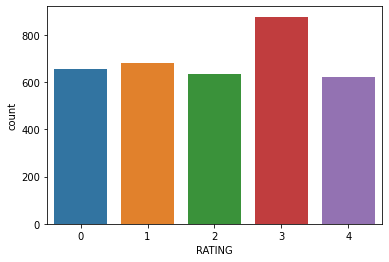

In [ ]:
sns.countplot(x=df["RATING"])
plt.show()

In [ ]:
rating_1 = []
for review in df.loc[df["RATING"] == 0]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_1.extend(token)

<FreqDist with 3267 samples and 31599 outcomes>


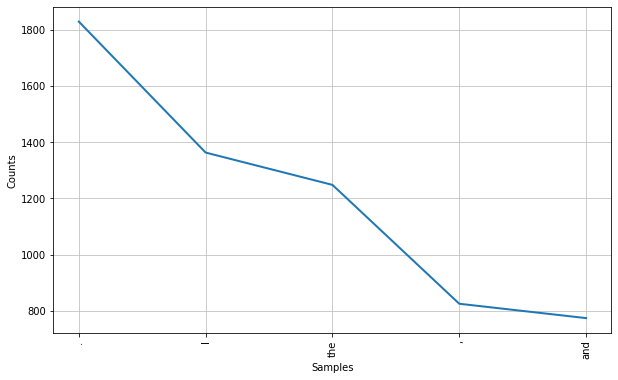

In [ ]:
 #calculate word frequency
 plt.figure(figsize=(10,6))

freq = nltk.FreqDist(rating_1)
freq.plot(5, cumulative=False)
plt.show()

### Data Preprocessing

<img src=https://miro.medium.com/max/700/0*plzLfemOxB1ftrKJ width="600">

##### An example for each sentiment

In [ ]:
print("Rating 1 :",df[df['RATING']==0]['TEXT'].values[0])
print("Rating 2 :",df[df['RATING']==1]['TEXT'].values[0])
print("Rating 3 :",df[df['RATING']==2]['TEXT'].values[0])
print("Rating 4 :",df[df['RATING']==3]['TEXT'].values[0])
print("Rating 5 :",df[df['RATING']==4]['TEXT'].values[0])

Rating 1 : The shirt was more of a smock. I expected a soft little cotton t shirt, but I suppose it\'s my fault for not reading the description carefully. Also, the white shirt was completely see through. I returned mine."}},{r:{id:46830320,si:1,pi:10860142,mu:"{f7dedd4c-02d2-49ba-9553-4f9be0bdb9e5}
Rating 2 : I liked the shirt. it\'s pretty. but I couldn\'t fit my arms in the shirt. the sleeves are too tight. get a size bigger if you don\'t have twig arms"}},{r:{id:47933895,si:1,v:3,t:3,r:1,h:"Not what I expected
Rating 3 : I was really excited to see this in mail today, but got very disappointed right after trying it. I'm a petite 5 ft. 3\
Rating 4 : I really like this dress! It\'s so comfortable, the colors are great for the summer, and it flows so nicely! I wore it to work &amp; to a night lounge dressed up with wedges! I got many compliments! 
Rating 5 : This dress is absolutely wonderful. Was afraid it might be too long for me, but the length is perfect! Dont even need to wear he

In [ ]:
def text_preprocessing(row):

  #lowercase
  row = row.lower()

  #stopwords
  stop_words = set(stopwords.words('english'))
  row = ' '.join([word for word in row.split() if word not in (stop_words)])

  #punctuation
  punctuation = set(string.punctuation)
  row = ''.join(ch for ch in row if ch not in punctuation)

  #lemmatization
  wn = nltk.WordNetLemmatizer()
  row = ' '.join([wn.lemmatize(word) for word in row.split()])

  return row

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean['TEXT'] = df_clean['TEXT'].apply(str).apply(lambda x: text_preprocessing(x))

In [ ]:
df_clean.head()

,TEXT,RATING
0,shirt smock expected soft little cotton shirt ...,0
3,received order today opened package appeared u...,0
4,first all button hole belt never matched size ...,0
5,didnt hold anything obvious,0
6,nothing else needed say,0


In [ ]:
df.head()

,TEXT,RATING
0,The shirt was more of a smock. I expected a so...,0
3,Just received my order today. When I opened th...,0
4,"First of all, the button hole on this belt nev...",0
5,these didnt hold anything up and was obvious i...,0
6,Nothing else needed to say,0


Comparing the text before and after preprocessing

In [ ]:
print("Rating 1 :",df[df['RATING']==0]['TEXT'].values[0])
print("Rating 2 :",df[df['RATING']==1]['TEXT'].values[0])
print("Rating 3 :",df[df['RATING']==2]['TEXT'].values[0])
print("Rating 4 :",df[df['RATING']==3]['TEXT'].values[0])
print("Rating 5 :",df[df['RATING']==4]['TEXT'].values[0])
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------")
print("Rating 1 :",df_clean[df_clean['RATING']==0]['TEXT'].values[0])
print("Rating 2 :",df_clean[df_clean['RATING']==1]['TEXT'].values[0])
print("Rating 3 :",df_clean[df_clean['RATING']==2]['TEXT'].values[0])
print("Rating 4 :",df_clean[df_clean['RATING']==3]['TEXT'].values[0])
print("Rating 5 :",df_clean[df_clean['RATING']==4]['TEXT'].values[0])

Rating 1 : The shirt was more of a smock. I expected a soft little cotton t shirt, but I suppose it\'s my fault for not reading the description carefully. Also, the white shirt was completely see through. I returned mine."}},{r:{id:46830320,si:1,pi:10860142,mu:"{f7dedd4c-02d2-49ba-9553-4f9be0bdb9e5}
Rating 2 : I liked the shirt. it\'s pretty. but I couldn\'t fit my arms in the shirt. the sleeves are too tight. get a size bigger if you don\'t have twig arms"}},{r:{id:47933895,si:1,v:3,t:3,r:1,h:"Not what I expected
Rating 3 : I was really excited to see this in mail today, but got very disappointed right after trying it. I'm a petite 5 ft. 3\
Rating 4 : I really like this dress! It\'s so comfortable, the colors are great for the summer, and it flows so nicely! I wore it to work &amp; to a night lounge dressed up with wedges! I got many compliments! 
Rating 5 : This dress is absolutely wonderful. Was afraid it might be too long for me, but the length is perfect! Dont even need to wear he

Plot the predominant words of each class

In [ ]:
rating_1 = []
for review in df_clean.loc[df_clean["RATING"] == 0]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_1.extend(token)

rating_2 = []
for review in df_clean.loc[df_clean["RATING"] == 1]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_2.extend(token)

rating_3 = []
for review in df_clean.loc[df_clean["RATING"] == 2]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_3.extend(token)

rating_4 = []
for review in df_clean.loc[df_clean["RATING"] == 3]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_4.extend(token)

rating_5 = []
for review in df_clean.loc[df_clean["RATING"] == 4]["TEXT"]:
  token = nltk.word_tokenize(review)
  rating_5.extend(token)

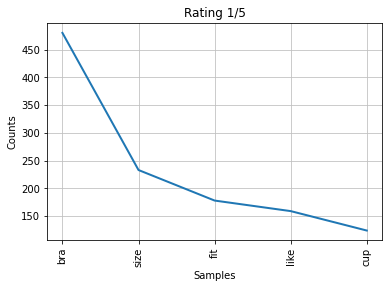

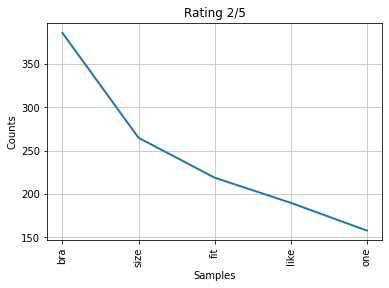

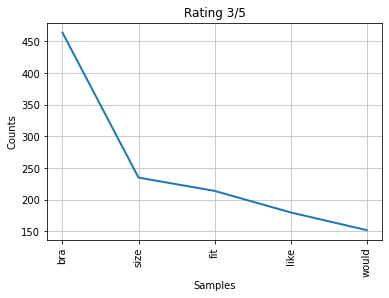

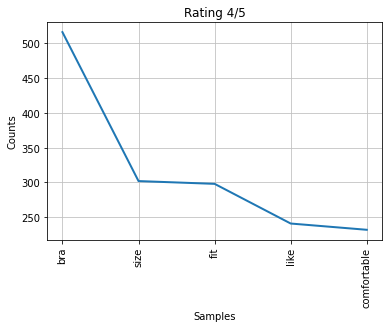

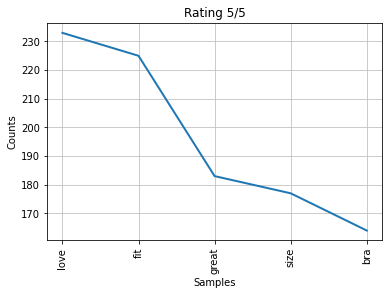

In [ ]:
# Word frequency

freq_1 = nltk.FreqDist(rating_1)
freq_2 = nltk.FreqDist(rating_2)
freq_3 = nltk.FreqDist(rating_3)
freq_4 = nltk.FreqDist(rating_4)
freq_5 = nltk.FreqDist(rating_5)

freq_1.plot(5, cumulative=False, title="Rating 1/5")
freq_2.plot(5, cumulative=False, title="Rating 2/5")
freq_3.plot(5, cumulative=False, title="Rating 3/5")
freq_4.plot(5, cumulative=False, title="Rating 4/5")
freq_5.plot(5, cumulative=False, title="Rating 5/5")
plt.show()

### Training our model using Transfer Learning

Import BERT from the transformers library

In [ ]:
from transformers import BertConfig, BertTokenizer, TFBertForSequenceClassification, InputExample, InputFeatures

config = BertConfig.from_pretrained("bert-base-uncased", hidden_dropout_prob=0.5, num_labels=5)
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", config=config)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  3845      
Total params: 109,486,085
Trainable params: 109,486,085
Non-trainable params: 0
_________________________________________________________________


Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_clean, test_size=0.25, random_state=123, shuffle=True)

In [ ]:
train.shape

(2600, 2)

In [ ]:
test.shape

(867, 2)

I'll use BERT's InputExample method to help us create sequences from our dataset

In [ ]:
InputExample(guid = None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

In [ ]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(gen,
                                          ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
                                          (
                                            {
                                                "input_ids": tf.TensorShape([None]),
                                                "attention_mask": tf.TensorShape([None]),
                                                "token_type_ids": tf.TensorShape([None]),
                                            },
                                            tf.TensorShape([]),
                                          ),
                                         )

In [ ]:
DATA_COLUMN = 'TEXT'
LABEL_COLUMN = 'RATING'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
list(train_InputExamples[:5]) #to see the structure of our data using the InputExample BERT function

[InputExample(guid=None, text_a='bustier make double pumping much easier great idea zipper one broke within first two week working keep going would recommend going another brand worth money hassle', text_b=None, label=1),
 InputExample(guid=None, text_a='fabric dress substantial feel high quality construction done well however fit dress odd short im 55 135 lb im small target dress thats ordered dress suppose correct size fit everywhere however short unless shorter am would absolutely consider work dress waist hit much higher natural waist again petite height might work you agree previous reviewer way skirt flare flattering add lot bulk high hope dress bomb', text_b=None, label=1),
 InputExample(guid=None, text_a='quite surprised styling versatility modal lounge pant 59 wa 335 in inseam 235lbs size 1820 somewhat curvy ordered long xxl im glad length perfect pant quite long though usually roll waistline tie bring legnth wearing flat walking shoesgym shoe tie regular waistline wearing hig

In [ ]:
list(train_data.take(1)) #to see the final structure of our dataset, generated by TensorFlow's tf.data.Dataset.from_generator() method

[({'attention_mask': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
   array([[1, 1, 1, ..., 0, 0, 0],
          [1, 1, 1, ..., 0, 0, 0],
          [1, 1, 1, ..., 0, 0, 0],
          ...,
          [1, 1, 1, ..., 0, 0, 0],
          [1, 1, 1, ..., 0, 0, 0],
          [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>,
   'input_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
   array([[  101,  4906, 17099, ...,     0,     0,     0],
          [  101,  4156,  7579, ...,     0,     0,     0],
          [  101,  3191,  3319, ...,     0,     0,     0],
          ...,
          [  101,  4606,  2946, ...,     0,     0,     0],
          [  101,  2364, 10520, ...,     0,     0,     0],
          [  101,  3517,  2438, ...,     0,     0,     0]], dtype=int32)>,
   'token_type_ids': <tf.Tensor: shape=(32, 128), dtype=int32, numpy=
   array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 

Compile and train the model

In [ ]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
#checkpoint_filepath = os.path.join(os.getcwd(), "checkpoints/weights-cnn.hdf5")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

checkpoint_filepath = '/content/drive/My Drive/Colab Notebooks/weights-nlp.hdf5'
checkpoint = ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(train_data, epochs=5, validation_data=validation_data, callbacks=checkpoint)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

### Final Thoughts:

* I've cleaned the data making text lowercase, removing punctuation, numbers and stopwords, and performing lemmatization. I've used nltk library to remove stopwords and the lemmatization.

* For the learning process I've used the clean lemmatized text. I've chosen the BERT model from the transformers library, as it's the state of art model for NLP and Transfer Learning. I've also used TensorFlow, for the input of the model.

* For the model evaluation, I've used the accuracy metric and the SparseCategoricalCrossentropy for the loss function. For the validation set, I've split the dataset at 75%/25%. The testing accuracy is 24%. It's too low, but I wanted to use the BERT model which has barely been published as open source for these type of sentiment analysis, which classifies not as positive/neutral/negative, but on 5 rating classes. It also needs a lot of hours for training. 

* With more time and data, I would have tried another models or training this one with more epochs, as well as training a RNN using Keras. Furthermore, 3400 samples are too few for a neural network.

* Future work: change the ratings from 1-5 to negative (1-2), neutral (3) and positive (4-5) to simplify the training.